<a id="top"></a>

<div class="list-group" id="list-tab" role="tablist">
<h3 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home">navigation</h3>

* [1. Library](#1)
* [2. Data reading](#2)
* [3. Get longitude and latitude user_location column](#3)
* [4. Data preprocessing adn Text cleaning](#4)
* [5. Simple sentiment analysis and Create wordcloud](#5)
* [6. geographical distribution of tweets](#6)

<a id="1"></a>

# Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re 
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
import nltk
from wordcloud import WordCloud
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
import plotly.express as px

nltk.download('stopwords')


stop_words = set(stopwords.words("english"))
default_stemmer = PorterStemmer()
default_stopwords = stopwords.words('english')
default_tokenizer=RegexpTokenizer(r"\w+")

ModuleNotFoundError: No module named 'wordcloud'

<a id="2"></a>
# Data reading

In [3]:
df = pd.read_csv('covid19_tweets.csv')
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


In [4]:
df = df.sample(n=2000)
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
108132,EQ Corp,"London, England","#EQCorp (""EQ"") works with funds and individual...",2011-03-15 10:40:29,1354,2885,1083,False,2020-08-11 07:59:17,#FTSE350 #pension schemes' buyout readiness hi...,"['FTSE350', 'pension', 'COVID19', 'SuperFunds']",Twitter Web App,False
92652,Pat Says. #MasksForAll 👋 #2m ↔️ Followback,Middle Eire,Love Ireland. Especially transparency in the c...,2019-12-31 00:30:17,1099,2824,37929,False,2020-08-09 07:37:26,"@CBFoley @MaryOHa12737978 '😁\n\nAlright, how a...",NaN,Twitter for Android,False
33532,Volmaster,NaN,I speak my mind,2018-12-17 10:56:45,327,549,5138,False,2020-07-28 06:03:12,Yesterday I had 2 energy drinks and tried to e...,NaN,Twitter for Android,False
129275,iamgouthamkumar,Bengaluru,Mayor of Bengaluru (Personal Handle)\n\nOffici...,2019-10-04 16:28:35,255,32,21,False,2020-08-14 03:59:13,Govt of Karnataka has established #COVID Care ...,['COVID'],Twitter for Android,False
70060,Deborah Nationless,Berlin,On a mission to rewrite my self-conceived epit...,2009-01-26 22:10:37,785,565,1164,False,2020-08-04 06:16:22,Trump not doing comedy is total comedy...\n\nU...,['COVID19'],Twitter Web App,False


In [5]:
df.shape

(2000, 13)

In [6]:
df.columns

Index(['user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'is_retweet'],
      dtype='object')

In [7]:
df_columns = df.columns.tolist()

In [8]:
dataTypeSeries = df.dtypes
print('Data type of each column of Dataframe :')
print(dataTypeSeries)

Data type of each column of Dataframe :
user_name           object
user_location       object
user_description    object
user_created        object
user_followers       int64
user_friends         int64
user_favourites      int64
user_verified         bool
date                object
text                object
hashtags            object
source              object
is_retweet            bool
dtype: object


In [9]:
df[df_columns].isnull().sum()

user_name             0
user_location       387
user_description    104
user_created          0
user_followers        0
user_friends          0
user_favourites       0
user_verified         0
date                  0
text                  0
hashtags            589
source                1
is_retweet            0
dtype: int64

<a id="3"></a>
# Get longitude and latitude user_location column

In [10]:
def do_geocode(address):
    geopy = Nominatim(user_agent='http')
    return geopy.geocode(address,exactly_one=True, timeout=1)




In [11]:
#Creating Geocoded Location column
df['GeocodedLocation']=df['user_location'].apply(lambda x: do_geocode(x) if x != None else None)

In [12]:
#Create the Latitude Column
lat=[]
for i in df['GeocodedLocation']:
    if i== None:
        lat.append(None)
    else:
        lat.append(i.latitude)
df['Latitude']=lat
df['Latitude'].astype('float')

108132    51.507322
92652     52.152800
33532     46.314475
129275    12.979120
70060     52.517037
            ...    
48827     44.843138
70973     12.750349
111184    57.148243
103210    53.840778
96532     36.701463
Name: Latitude, Length: 2000, dtype: float64

In [13]:
#Create the Longitude Column
long=[]
for i in df['GeocodedLocation']:
    if i== None:
        long.append(None)
    else:
        long.append(i.longitude)
df['Longitude']=long
df['Longitude'].astype('float')

108132     -0.127647
92652      -7.722301
33532      11.048029
129275     77.591300
70060      13.388860
             ...    
48827     -80.200761
70973     122.731210
111184     -2.092809
103210     -0.433372
96532    -118.755997
Name: Longitude, Length: 2000, dtype: float64

<a id="4"></a>
# Data preprocessing and Text cleaning 

In [14]:
#df = df.drop(["user_location"],axis = 1)

In [15]:
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,GeocodedLocation,Latitude,Longitude
108132,EQ Corp,"London, England","#EQCorp (""EQ"") works with funds and individual...",2011-03-15 10:40:29,1354,2885,1083,False,2020-08-11 07:59:17,#FTSE350 #pension schemes' buyout readiness hi...,"['FTSE350', 'pension', 'COVID19', 'SuperFunds']",Twitter Web App,False,"(London, Greater London, England, United Kingd...",51.507322,-0.127647
92652,Pat Says. #MasksForAll 👋 #2m ↔️ Followback,Middle Eire,Love Ireland. Especially transparency in the c...,2019-12-31 00:30:17,1099,2824,37929,False,2020-08-09 07:37:26,"@CBFoley @MaryOHa12737978 '😁\n\nAlright, how a...",NaN,Twitter for Android,False,"(Ballykerin Middle, Modelligo, The Municipal D...",52.152800,-7.722301
33532,Volmaster,NaN,I speak my mind,2018-12-17 10:56:45,327,549,5138,False,2020-07-28 06:03:12,Yesterday I had 2 energy drinks and tried to e...,NaN,Twitter for Android,False,"(Nanno, Comunità della Val di Non, Provincia d...",46.314475,11.048029
129275,iamgouthamkumar,Bengaluru,Mayor of Bengaluru (Personal Handle)\n\nOffici...,2019-10-04 16:28:35,255,32,21,False,2020-08-14 03:59:13,Govt of Karnataka has established #COVID Care ...,['COVID'],Twitter for Android,False,"(Bengaluru, Bangalore North, Bangalore Urban, ...",12.979120,77.591300
70060,Deborah Nationless,Berlin,On a mission to rewrite my self-conceived epit...,2009-01-26 22:10:37,785,565,1164,False,2020-08-04 06:16:22,Trump not doing comedy is total comedy...\n\nU...,['COVID19'],Twitter Web App,False,"(Berlin, Deutschland, (52.5170365, 13.3888599))",52.517037,13.388860


In [16]:
df['user_created'] =  pd.to_datetime(df['user_created'], format='%Y-%m-%d %H:%M:%S')

In [17]:
df['date'] =  pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M:%S')

In [18]:
df['date'] = pd.to_datetime(df['date']).dt.date
df['day'] = pd.to_datetime(df['date']).dt.day
df = df.sort_values(by='date')


In [19]:
 def clean_text(text, ):
        if text is not None:
        #exclusions = '|'.join(exclusions)
                text = re.sub(r'[0-9]+','',text)
                text =  text.lower()
                text = re.sub('-', '', text)
                text = re.sub('_', '', text)
                text = re.sub('@', '', text)
                text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
                #text = re.sub(r'\S*@\S*\s?', '', text, flags=re.MULTILINE)
        # Remove text between square brackets
                text =re.sub('\[[^]]*\]', '', text)
        # removes punctuation
                text = re.sub(r'[^\w\s]','',text)
                text = re.sub(r'\n',' ',text)
                text = re.sub(r'[0-9]+','',text)
                #text = re.sub(r'[0-9]+','',text)
        # strip html 
                p = re.compile(r'<.*?>')
                text = re.sub(r"\'ve", " have ", text)
                text = re.sub(r"can't", "cannot ", text)
                text = re.sub(r"n't", " not ", text)
                text = re.sub(r"I'm", "I am", text)
                text = re.sub(r" m ", " am ", text)
                text = re.sub(r"\'re", " are ", text)
                text = re.sub(r"\'d", " would ", text)
                text = re.sub(r"\'ll", " will ", text)
        
                text = p.sub('', text)

        def tokenize_text(text,tokenizer=default_tokenizer):
            token = default_tokenizer.tokenize(text)
            return token
        
        def remove_stopwords(text, stop_words=default_stopwords):
            tokens = [w for w in tokenize_text(text) if w not in stop_words]
            return ' '.join(tokens)

        def stem_text(text, stemmer=default_stemmer):
            tokens = tokenize_text(text)
            return ' '.join([stemmer.stem(t) for t in tokens])

        text = stem_text(text) # stemming
        text = remove_stopwords(text) # remove stopwords
        #text.strip(' ') # strip whitespaces again?

        return text

In [20]:
df['user_name'] = df['user_name'].apply(clean_text)


In [21]:
df['user_description'] = df['user_description'].replace(np.nan, '', regex=True)
df['user_description'] = df['user_description'].apply(clean_text)

In [22]:
df['text'] = df['text'].apply(clean_text)

<a id="5"></a>
# Simple sentiment analysis and create world cloud

In [23]:
tweet_text_list = df.text.tolist()
tweet_text_string = ''.join(tweet_text_list)

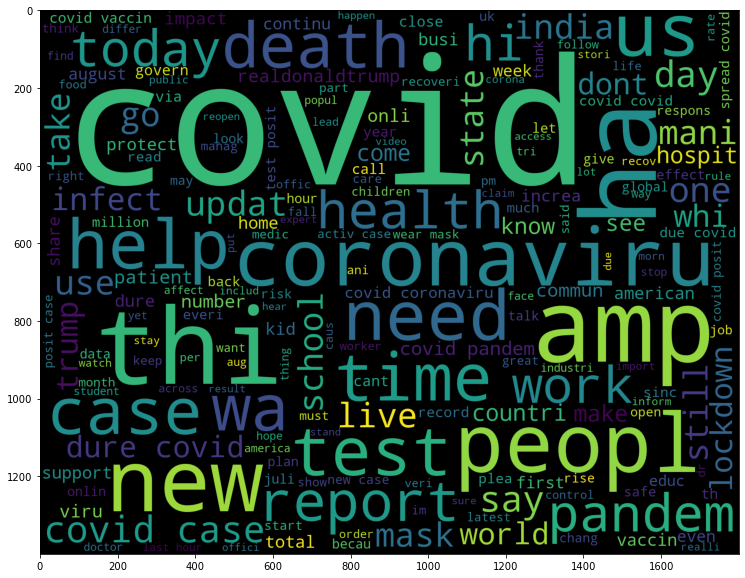

In [24]:
wordcloud_ip = WordCloud(
                      background_color='black',
                      margin=3,
                      width=1800,
                      height=1400,
                      max_words=200
                     ).generate(tweet_text_string)

plt.figure( figsize=(20,10) )
plt.imshow(wordcloud_ip)

<a id="6"></a>
# Geographical distribution of tweets

In [25]:
fig = px.scatter_geo(df,lat = df["Latitude"] ,
                     lon = df["Longitude"],
                     animation_frame="day",
                     hover_name="user_name",
                     animation_group="day",
                     #size="user_followers"
                    
                     )
fig.update_geos(projection_type="natural earth")
fig.show()